## Table of Contents:
1. [Introduction](#1.-Introduction)
    
    
2. [Data](#2.-Data)
    
    2.1. [Import Libraries & Data Loading](#2.1.-Import-Libraries-&-Data-Loading)

    2.2. [Data Cleaning](#2.2.-Data-Cleaning)
    
    
3. [Descriptive Statistics](#3.-Descriptive-Statistics)
 
    3.1. [Measures of central tendency](#3.1.-Measures-of-central-tendency)

# 1. Introduction

This notebook will focus mainly on the aspect "if this is true that the smarter population, the more % of the population vaccinated".

# 2. Data

## 2.1. Import Libraries & Data Loading

In [1]:
import folium 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats


In [2]:
Vaccine = pd.read_excel('Worldwide Vaccine Data.xlsx')
Vaccine.head(5)

,Country,country code,latitude,longitude,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated
0,Afghanistan,AF,33.939110,67.709953,15,5872684,14.0,12.0
1,Albania,AL,41.153332,20.168331,97,2773475,45.0,43.0
2,Algeria,DZ,28.033886,1.659626,32,13704895,17.0,14.0
3,Angola,AO,-11.202692,17.873887,55,17535411,35.0,19.0
4,Argentina,AR,-38.416097,-63.616672,216,97181658,91.0,82.0


In [3]:
Vaccine.shape # rows & columns

(187, 8)

## 2.2. Data Cleaning

In [4]:
#print(os.listdir()) the file that we have in the folder

In [5]:
Vaccine.isnull().sum()

Country                              0
country code                         1
latitude                             0
longitude                            0
Doses administered per 100 people    0
Total doses administered             0
% of population fully vaccinated     0
% of population vaccinated           0
dtype: int64

* ###  Step 1: Detecting NA

In [6]:
missing_value = ["NA", np.nan]
Vaccine = pd.read_excel('Worldwide Vaccine Data.xlsx', na_values = missing_value)
Vaccine.isnull().sum()

Country                              0
country code                         1
latitude                             0
longitude                            0
Doses administered per 100 people    0
Total doses administered             0
% of population fully vaccinated     0
% of population vaccinated           0
dtype: int64

In [7]:
Vaccine.isnull().any() #any check if any is null, TRUE we have

Country                              False
country code                          True
latitude                             False
longitude                            False
Doses administered per 100 people    False
Total doses administered             False
% of population fully vaccinated     False
% of population vaccinated           False
dtype: bool

####  Visualization the values

<AxesSubplot:>

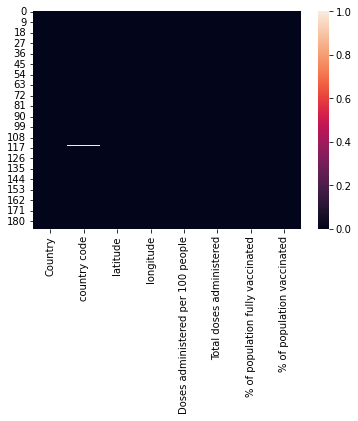

In [8]:
#sns.heatmap(Vaccine.isnull()) with ylabels
#sns.heatmap(Vaccine.isnull(), yticklabels = False, annot=True) #annot gives the value 0 if is not null , 1 if it is null
sns.heatmap(Vaccine.isnull())

* ### Step 2: Replaced NA values

In [9]:
## NA is not a NA value is a country code od Nambia
Vaccine.fillna('NA.', inplace = True)
# Vaccine.isnull().sum().sum() #check if the null in dataset right now

In [10]:
Vaccine[108:120]

,Country,country code,latitude,longitude,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated
108,Mexico,MX,23.634501,-102.552784,150,191907868,67.0,62.0
109,Moldova,MD,47.411631,28.369885,80,2131054,41.0,40.0
110,Mongolia,MN,46.862496,103.846656,170,5480965,70.0,67.0
111,Montenegro,ME,42.708678,19.374390,108,669505,47.0,45.0
112,Morocco,MA,31.791702,-7.092620,149,54308312,68.0,64.0
113,Mozambique,MZ,-18.665695,35.529562,92,27843440,47.0,44.0
114,Myanmar,MM,21.913965,95.956223,94,50579710,51.0,41.0
115,Namibia,NA.,-22.957640,18.490410,34,839674,18.0,15.0
116,Nepal,NP,28.394857,84.124008,141,40406877,77.0,67.0
117,Netherlands,NL,52.132633,5.291266,197,34190553,78.0,72.0


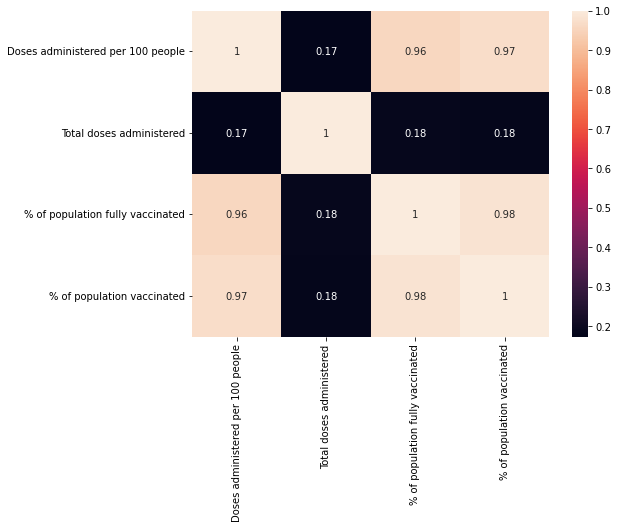

In [11]:
fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].corr(method = 'pearson'), annot = True)
plt.show()

# 3. Descriptive Statistics

## 3.1. Measures of central tendency

* ### Mean 

In [12]:
mean = Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].mean()
pd.set_option('display.float_format', lambda x: '%0.4f' % x) # Scientific Notation to floats using Panda
mean

Doses administered per 100 people        122.7861
Total doses administered            60791544.4973
% of population fully vaccinated          55.1016
% of population vaccinated                49.5840
dtype: float64

* ### Trimmed mean (a variation of the mean)

In [13]:
trimMean = stats.trim_mean(Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']], 0.1)
trim = list(trimMean)
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
trim

[122.3841059602649, 16642664.251655629, 56.496688741721854, 50.397350993377486]

* ### Weighted mean

In [15]:
np.average(Vaccine[['% of population fully vaccinated']], weights = Vaccine[['Total doses administered']])

78.25803431957567

* ### Median 

In [102]:
median = Vaccine[['Doses administered per 100 people', 'Total doses administered', '% of population fully vaccinated', '% of population vaccinated']].median()
median

Doses administered per 100 people        124.0
Total doses administered             7580976.0
% of population fully vaccinated          61.0
% of population vaccinated                54.0
dtype: float64

In [17]:
def select_marker_color(row):
    if row['% of population fully vaccinated'] < 20.0:
        return 'pink'
    elif row['% of population fully vaccinated'] < 40.0:
        return 'blue'
    elif row['% of population fully vaccinated'] < 60.0:
        return 'purple'
    elif row['% of population fully vaccinated'] < 80.0:
        return 'green'
    return 'lightblue'

In [18]:
Vaccine['color'] = Vaccine.apply(select_marker_color, axis = 1)
Vaccine.head(5)

,Country,country code,latitude,longitude,Doses administered per 100 people,Total doses administered,% of population fully vaccinated,% of population vaccinated,color
0,Afghanistan,AF,33.939110,67.709953,15,5872684,14.0,12.0,pink
1,Albania,AL,41.153332,20.168331,97,2773475,45.0,43.0,purple
2,Algeria,DZ,28.033886,1.659626,32,13704895,17.0,14.0,pink
3,Angola,AO,-11.202692,17.873887,55,17535411,35.0,19.0,blue
4,Argentina,AR,-38.416097,-63.616672,216,97181658,91.0,82.0,lightblue


In [19]:
my_map = folium.Map(
    location = [13.133932434766733, 16.103938729508073],
    zoom_start = 2
)

for _, country in Vaccine.iterrows():
    folium.Marker(
        location = [country['latitude'], country['longitude']] ,
        popup = country['Country'],
        tooltip = (country['Country'], country['Total doses administered'], country['% of population vaccinated']), 
        icon = folium.Icon(color = country['color'], prefix = 'fa', icon = 'circle')
    ).add_to(my_map)

my_map

In [20]:
my_map.save('my_map.html')